In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('Cleaned_PlayStore_Data.csv')
datacopy=data.copy()

Questions

Which Category has Largest Number of Installation?

In [11]:
datacopy['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [18]:
df_cat_install=datacopy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)[:10]
df_cat_install

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452771915
FAMILY                10041692505
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

In [20]:
df_cat_install=df_cat_install.reset_index()
df_cat_install

,index,Category,Installs
0,0,GAME,31544024415
1,1,COMMUNICATION,24152276251
2,2,SOCIAL,12513867902
3,3,PRODUCTIVITY,12463091369
4,4,TOOLS,11452771915
5,5,FAMILY,10041692505
6,6,PHOTOGRAPHY,9721247655
7,7,TRAVEL_AND_LOCAL,6361887146
8,8,VIDEO_PLAYERS,6222002720
9,9,NEWS_AND_MAGAZINES,5393217760


<Axes: xlabel='Installs', ylabel='Category'>

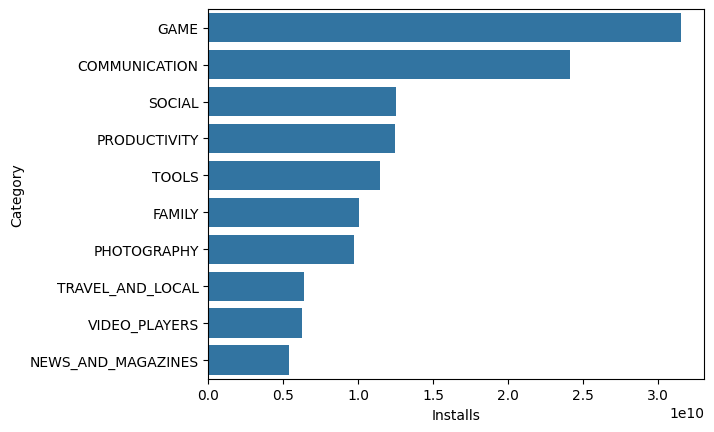

In [21]:
sns.barplot(x='Installs',y='Category',data=df_cat_install)

What are top 5 most Installed Apps in Each Category?

In [ ]:
datacopy.groupby(['Category','App'])['Installs'].sum()

In [45]:
df=datacopy.groupby(['Category','App'])['Installs'].sum().reset_index()
df

,Category,App,Installs
0,ART_AND_DESIGN,350 Diy Room Decor Ideas,10000
1,ART_AND_DESIGN,3D Color Pixel by Number - Sandbox Art Coloring,100000
2,ART_AND_DESIGN,AJ Styles HD Wallpapers,5000
3,ART_AND_DESIGN,AJ Styles Wallpaper 2018 - AJ Styles HD Wallpaper,1000
4,ART_AND_DESIGN,Ai illustrator viewer,100000
...,...,...,...
9739,WEATHER,Yahoo Weather,10000000
9740,WEATHER,Yahoo! Weather for SH Forecast for understandi...,1000000
9741,WEATHER,Yandex.Weather,10000000
9742,WEATHER,weather - weather forecast,1000000


In [37]:
df[df['Category']=='ART_AND_DESIGN'].sort_values(ascending=False,by='Installs')[:5]

,Category,App,Installs
48,ART_AND_DESIGN,Sketch - Draw & Paint,50000000
55,ART_AND_DESIGN,Textgram - write on photos,20000000
9,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
62,ART_AND_DESIGN,ibis Paint X,10000000
52,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000


In [41]:
df[df['Category']=='GAME'].sort_values(ascending=False,by='Installs')[:5]

,Category,App,Installs
4852,GAME,Subway Surfers,5000000000
4881,GAME,Temple Run 2,2500000000
4245,GAME,Candy Crush Saga,2000000000
4707,GAME,Pou,1500000000
4659,GAME,My Talking Tom,1000000000


In [55]:
apps=datacopy['Category'].unique()
apps

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [61]:
apps=['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', ]

C:\Users\ACER PREDATOR\AppData\Local\Temp\ipykernel_6152\835693862.py:16: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\ACER PREDATOR\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


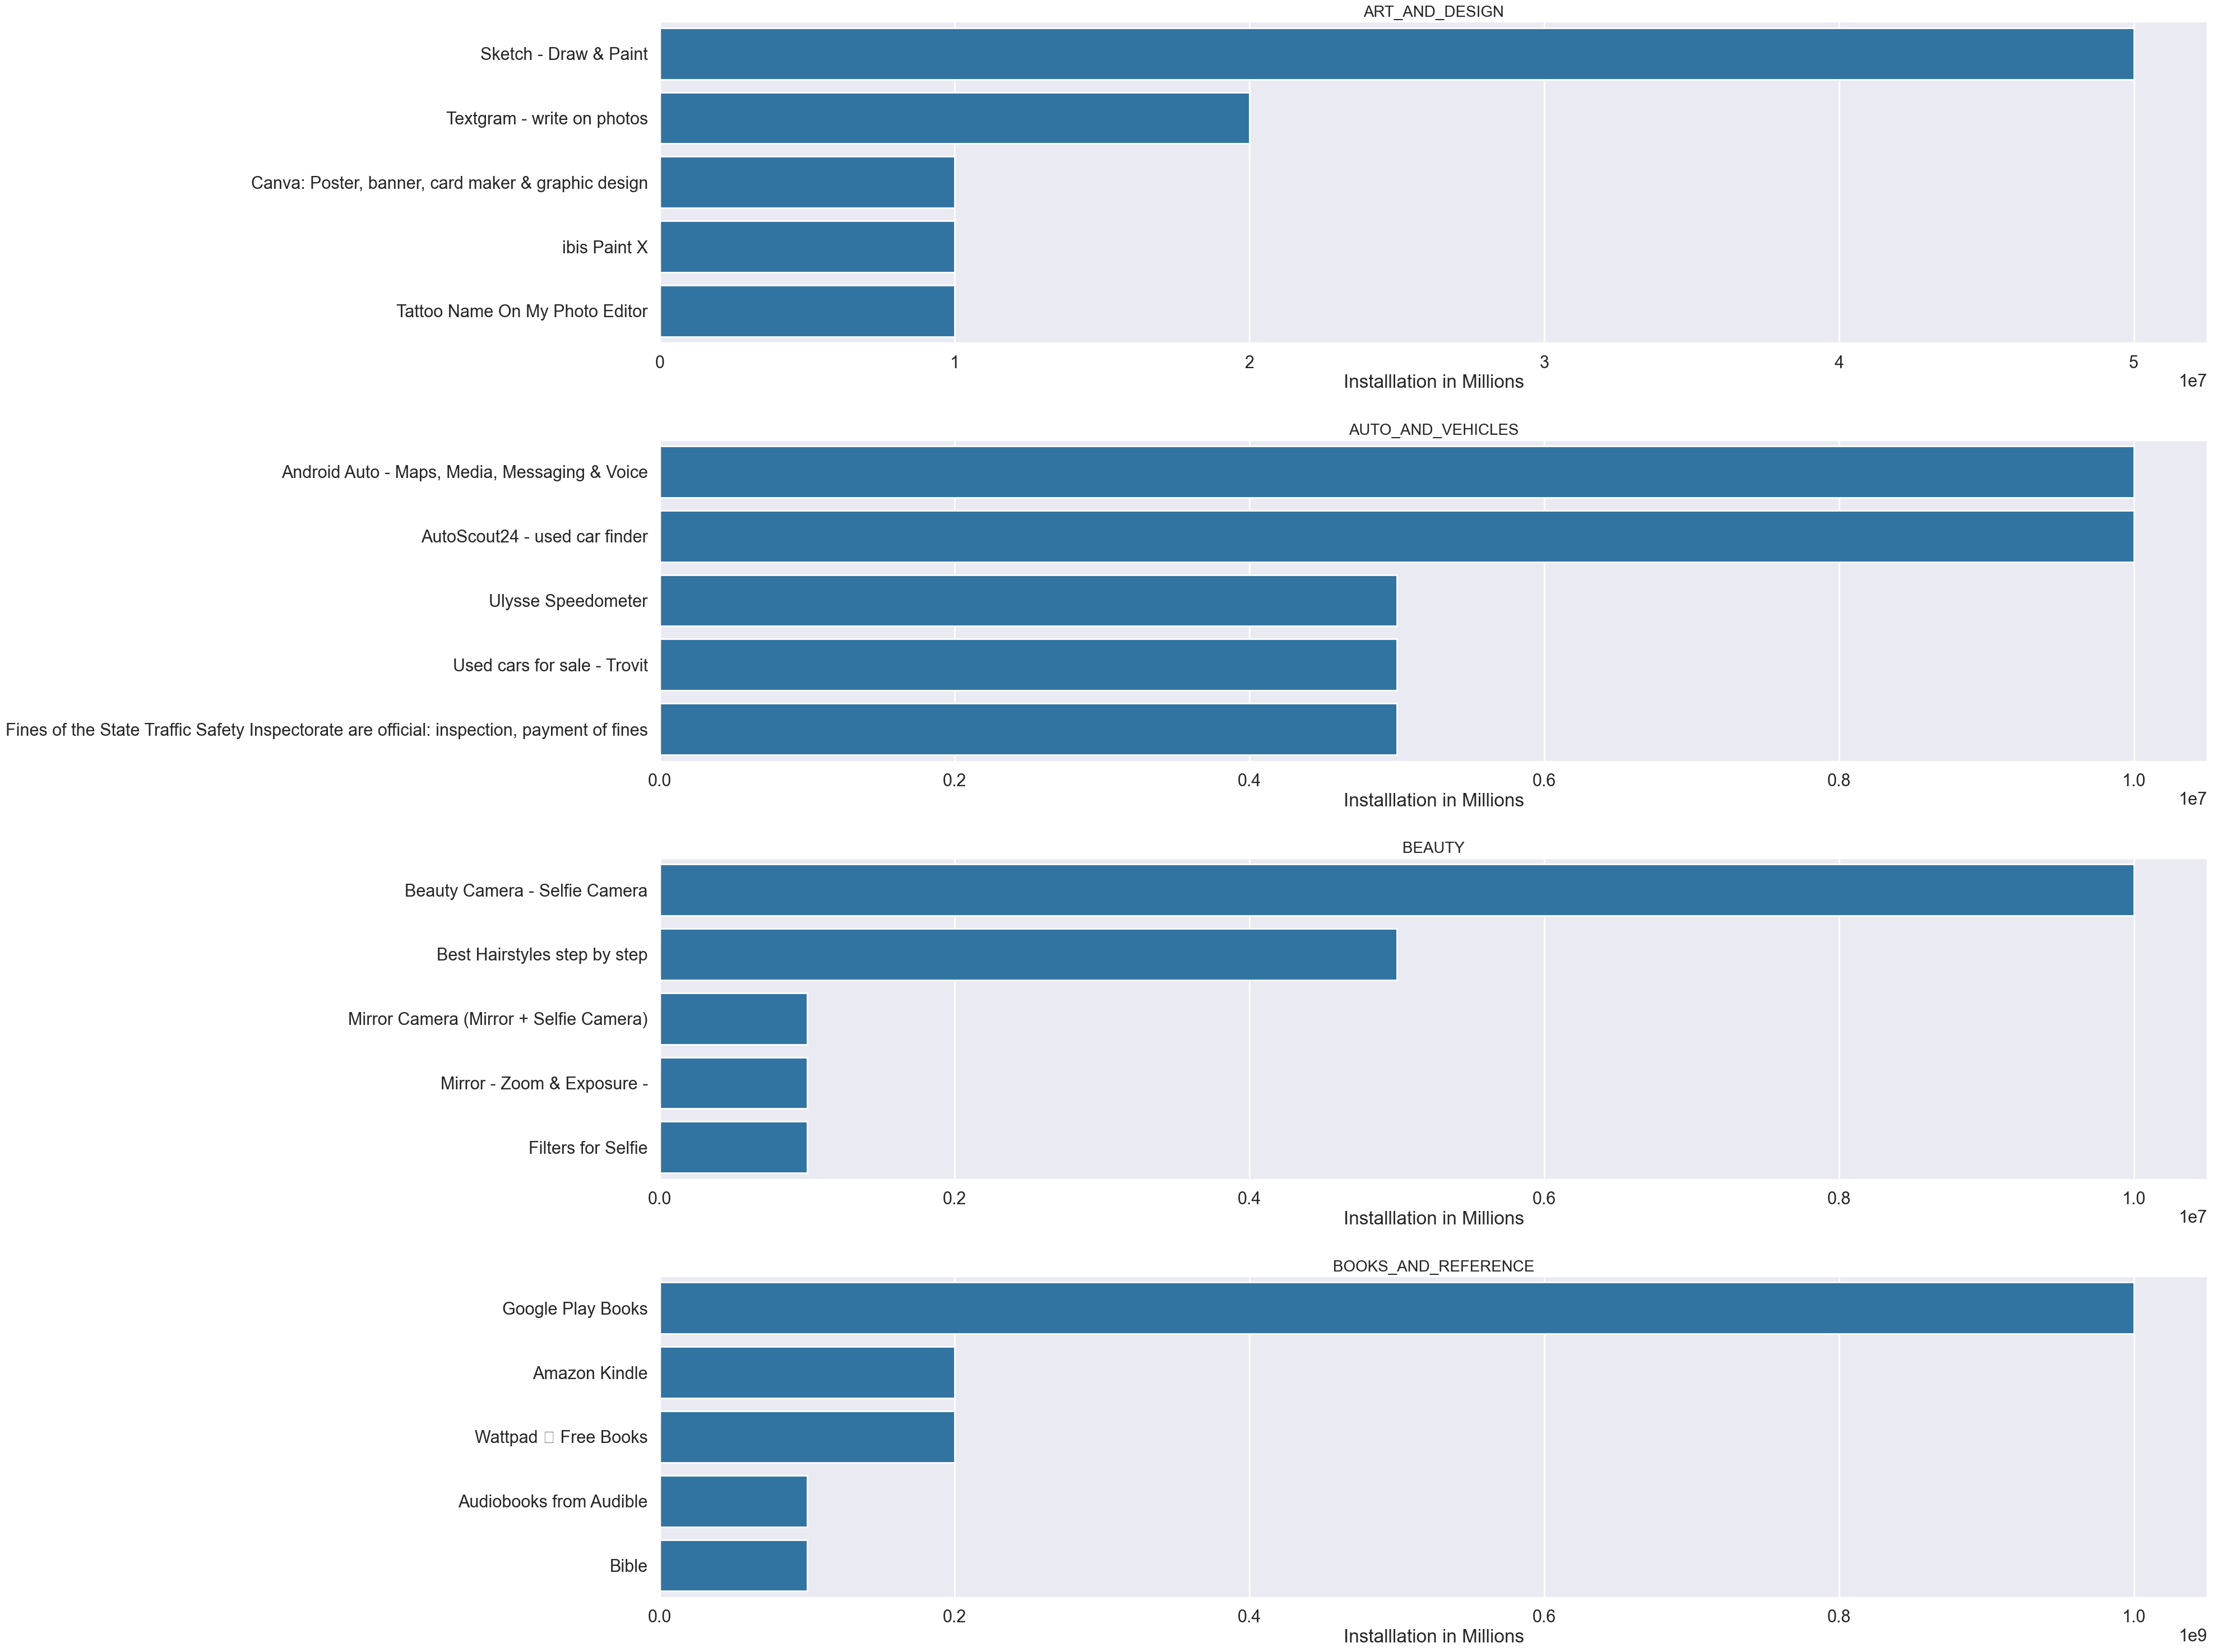

In [62]:
#Now For every category


sns.set_context('poster')
sns.set_style('darkgrid')
plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2=df[df['Category']==app].sort_values(ascending=False,by='Installs')[:5]
    df3=df2.head(5)
    plt.subplot(4,1,i+1)
    sns.barplot(data=df3,x='Installs',y='App')
    plt.xlabel('Installlation in Millions')
    plt.ylabel('')
    plt.title(app,size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

How many apps are There in Playstore with 5 rating ?

In [98]:
datacopy[datacopy['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
296,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3,26,6,2018
546,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3,17,7,2018
549,Awake Dating,DATING,5.0,2,70.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4,24,7,2018
567,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3,14,7,2018
570,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10238,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1,19,6,2017
10259,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4,31,12,2017
10292,Monster Ride Pro,GAME,5.0,1,24.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3,5,3,2018
10336,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1,27,6,2018


In [102]:
how_many_5stars=len(datacopy[datacopy['Rating']==5])
print(f'we have {how_many_5stars}  Five star rating apps')

we have 271  Five star rating apps


In [106]:
datacopy[datacopy['Rating']==5]['App']

296                    Hojiboy Tojiboyev Life Hacks
546                   American Girls Mobile Numbers
549                                    Awake Dating
567                           Spine- The dating app
570      Girls Live Talk - Free Text and Video Chat
                            ...                    
10238                             Mad Dash Fo' Cash
10259                         GKPB FP Online Church
10292                              Monster Ride Pro
10336                               Fr. Daoud Lamei
10353              Fr. Mike Schmitz Audio Teachings
Name: App, Length: 271, dtype: object

In [112]:
# Other Approach
rating=datacopy.groupby(['App','Rating']).sum().sort_values(ascending=False,by='Rating').reset_index()
rating[rating.Rating==5]
len(rating[rating.Rating==5])

271

Which Category apps usees are reviewing the most?

Which Category has the largest of the size?